The data used is 100 images from VOC_2012 in the 'demo_data' folder of current directory.  
75 images in train-data  
25 images in test-data  

In [14]:
# Package imports
from PIL import Image
import _pickle as pkl
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

tf.reset_default_graph()

sess = tf.InteractiveSession()
import glob
import os
%matplotlib inline  
print ("Packs loaded...")

Packs loaded...


In [15]:
def get_img_list(imagepath, segmentpath):
    '''
    input: 
        imagepath -> path to images directory
        Segmentpath -> path to segments directory
    output: 
        list of paths to all the images and for segmentation ground-truth 
    '''
    path1 = os.getcwd() + '/' + imagepath
    path2 = os.getcwd() + '/' + segmentpath
    imglist = glob.glob(path1 + '/*.jpg')
    annotlist = glob.glob(path2 + '/*.png')
    return imglist, annotlist

def data_preprocess(imglist, annotlist, height=224, width=224, num_classes=2):
    '''
    input:
        imglist, annotlist -> list of paths to all images, groung-truth
    output:
        Data -> 4-d array [number of images , height , width , 3]
        Label -> 4-d array [number of annotations , height , width , 1]
        LabelOneHot -> 4-d array [number of annotations , height , width , num_classes]
    '''
    Data = None
    Label = None
    LabelOneHot = None 
    for (f1, f2, i) in zip(imglist, annotlist, range(len(trainimglist))):
        # image
        img1 = Image.open(f1)
        img1 = img1.resize((height, width))
        rgb  = np.array(img1).reshape(1, height, width, 3)
        # label
        img2 = Image.open(f2)
        img2 = img2.resize((height, width), Image.LINEAR)
        label = np.array(img2).reshape(1, height, width, 1)
        # Stack images and labels
        if i == 0: 
            Data = rgb
            Label = label
        else:
            Data = np.concatenate((Data, rgb), axis=0)
            Label = np.concatenate((Label, label), axis=0)
    
    # Label for 'border' changed from '255' to '21' (new label) or to '0' (background)
    Label[Label == 255] = 0

    # Onehot-coded label
    class_labels_tensor = tf.not_equal(Label, 0)
    background_labels_tensor = tf.equal(Label, 0)
    ''' for more classes we can use onehotencoding from tf.contrib (one line code) '''
    # Convert the boolean values into floats -- so that
    # computations in cross-entropy loss is correct
    bit_mask_class = tf.to_float(class_labels_tensor)
    bit_mask_background = tf.to_float(background_labels_tensor)

    LabelOneHot = (tf.concat(axis=3, values=[bit_mask_class,
                                             bit_mask_background])).eval()
    return Data, Label, LabelOneHot


In [16]:
# Location of the files

train_image = 'demo_data/train_images/'
train_segments = 'demo_data/train_segmented/'
test_image = 'demo_data/test_images/'
test_segments = 'demo_data/test_segmented/'

trainimglist, trainannotlist = get_img_list(train_image, train_segments)
trainimglist.sort()
trainannotlist.sort()
print ("%d train images" % (len(trainimglist)))
print ("%d train annotations" % (len(trainannotlist)))


testimglist, testannotlist = get_img_list(test_image, test_segments)
testimglist.sort()
testannotlist.sort()
print ("%d test images" % (len(testimglist)))
print ("%d test annotations" % (len(testannotlist)))

trainData, trainLabel, trainLabelOneHot = data_preprocess(trainimglist, trainannotlist)
testData, testLabel, testLabelOneHot = data_preprocess(testimglist, testannotlist)

# Batch-dimensions
print ("                               N * H *  W * C")
print ("Training images:            ", trainData.shape)
print ("Training annotation images: ", trainLabel.shape)
print ("Test images:                ", testData.shape)
print ("Test annotations images:    ", testLabel.shape)

print ()
print ("Shape of 'trainLabelOneHot': %s" % (trainLabelOneHot.shape,))
print ("Shape of 'testLabelOneHot' : %s" % (testLabelOneHot.shape,))
print ("\n* * * DATA PROCESSING COMPLETED * * *")

100 train images
100 train annotations
33 test images
33 test annotations
                               N * H *  W * C
Training images:             (100, 224, 224, 3)
Training annotation images:  (100, 224, 224, 1)
Test images:                 (33, 224, 224, 3)
Test annotations images:     (33, 224, 224, 1)

Shape of 'trainLabelOneHot': (100, 224, 224, 2)
Shape of 'testLabelOneHot' : (33, 224, 224, 2)

* * * DATA PROCESSING COMPLETED * * *


In [17]:
# Memory consumption (by default np.array is FLOAT32 i.e. 32 bits)
print ("Train Image data     : %.2f" % (trainData.nbytes / (1024*1024)), " MB")
print ("Train Annotation data: %.2f" % (trainLabel.nbytes / (1024*1024)), " MB")
print ("Test Image data      : %.2f" % (testData.nbytes / (1024*1024)), " MB")
print ("Test Annotation data : %.2f" % (testLabel.nbytes / (1024*1024)), " MB")

print ("Train One-Hot Annotation data: %.2f" % (trainLabelOneHot.nbytes / (1024*1024)), " MB")
print ("Test One-Hot Annotation data : %.2f" % (testLabelOneHot.nbytes / (1024*1024)), " MB")

Train Image data     : 14.36  MB
Train Annotation data: 4.79  MB
Test Image data      : 4.74  MB
Test Annotation data : 1.58  MB
Train One-Hot Annotation data: 38.28  MB
Test One-Hot Annotation data : 12.63  MB


(-0.5, 223.5, 223.5, -0.5)

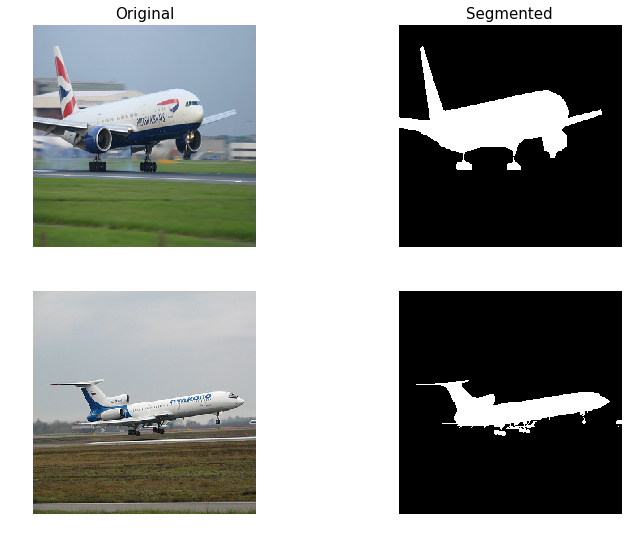

In [18]:
# Samples from data set
fig = plt.figure(figsize=(12,9))
gs = gridspec.GridSpec(2, 2)

idx = 10
# Sample_1
ax11 = fig.add_subplot(gs[0, 0])
ax11.imshow(trainData[idx])
ax11.axis('off')
ax11.set_title('Original', fontsize=15)

ax12 = fig.add_subplot(gs[0, 1])
ax12.imshow(trainLabel[idx,:,:,0], cmap='gray')
ax12.axis('off')
ax12.set_title('Segmented', fontsize=15)

# Sample_2
ax21 = fig.add_subplot(gs[1, 0])
ax21.imshow(testData[idx])
ax21.axis('off')

ax22 = fig.add_subplot(gs[1, 1])
ax22.imshow(testLabel[idx,:,:,0], cmap='gray')
ax22.axis('off')


In [20]:
height = 224
width = 224
nrclass = 2
# Define functions
x = tf.placeholder(tf.float32, [None, height, width, 3], name="X_image")
y = tf.placeholder(tf.float32, [None, height, width, nrclass], name="y_ground_truth")
keepprob = tf.placeholder(tf.float32)

# Kernels
ksize = 3
input_channels = 3

def weight_variable(shape, name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial,name=name, dtype=tf.float32)
    
def bias_variable(shape, name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name=name, dtype=tf.float32)
weights = {
    "wc1" : weight_variable([3, 3, 3, 64], "Weight_conv_1"),
    "wc2" : weight_variable([3, 3, 64, 64], "Weight_conv_2"),
    "wc3" : weight_variable([3, 3, 64, 128], "Weight_conv_3"),
    "wc4" : weight_variable([3, 3, 128, 128], "Weight_conv_4"),
    "wc5" : weight_variable([3, 3, 128, 256], "Weight_conv_5"),
    "wc6" : weight_variable([3, 3, 256, 256], "Weight_conv_6"),
    "wc7" : weight_variable([3, 3, 256, 256], "Weight_conv_7"),
    "wc8" : weight_variable([3, 3, 256, 512], "Weight_conv_8"),
    "wc9" : weight_variable([3, 3, 512, 512], "Weight_conv_9"),
    "wc10" : weight_variable([3, 3, 512, 512], "Weight_conv_10"),
    "wc11" : weight_variable([3, 3, 512, 512], "Weight_conv_11"),
    "wc12" : weight_variable([3, 3, 512, 512], "Weight_conv_12"),
    "wc13" : weight_variable([3, 3, 512, 512], "Weight_conv_13"),
    "wc14" : weight_variable([7, 7, 512, 2048], "Weight_conv_14"),
    "wc15" : weight_variable([1, 1, 2048, 2048], "Weight_conv_15"),
    "wc16" : weight_variable([7, 7, 512, 2048], "Weight_conv_16"),
    "wc17" : weight_variable([3, 3, 512, 512], "Weight_conv_17"),
    "wc18" : weight_variable([3, 3, 512, 512], "Weight_conv_18"),
    "wc19" : weight_variable([3, 3, 512, 512], "Weight_conv_19"),
    "wc20" : weight_variable([3, 3, 512, 512], "Weight_conv_20"),
    "wc21" : weight_variable([3, 3, 512, 512], "Weight_conv_21"),
    "wc22" : weight_variable([3, 3, 256, 512], "Weight_conv_22"),
    "wc23" : weight_variable([3, 3, 256, 256], "Weight_conv_23"),
    "wc24" : weight_variable([3, 3, 256, 256], "Weight_conv_24"),
    "wc25" : weight_variable([3, 3, 128, 256], "Weight_conv_25"),
    "wc26" : weight_variable([3, 3, 128, 128], "Weight_conv_26"),
    "wc27" : weight_variable([3, 3, 64, 128], "Weight_conv_27"),
    "wc28" : weight_variable([3, 3, 64, 64], "Weight_conv_28"),
    "wc29" : weight_variable([3, 3, 64, 64], "Weight_conv_29"),
    "wc30" : weight_variable([1, 1, 2, 64], "Weight_conv_30")
    }

biases = {
    "bc1" : bias_variable([64], "Bias_conv_1"),
    "bc2" : bias_variable([64], "Bias_conv_2"),
    "bc3" : bias_variable([128], "Bias_conv_3"),
    "bc4" : bias_variable([128], "Bias_conv_4"),
    "bc5" : bias_variable([256], "Bias_conv_5"),
    "bc6" : bias_variable([256], "Bias_conv_6"),
    "bc7" : bias_variable([256], "Bias_conv_7"),
    "bc8" : bias_variable([512], "Bias_conv_8"),
    "bc9" : bias_variable([512], "Bias_conv_9"),
    "bc10" : bias_variable([512], "Bias_conv_10"),
    "bc11" : bias_variable([512], "Bias_conv_11"),
    "bc12" : bias_variable([512], "Bias_conv_12"),
    "bc13" : bias_variable([512], "Bias_conv_13"),
    "bc14" : bias_variable([2048], "Bias_conv_2"),
    "bc15" : bias_variable([2048], "Bias_conv_3"),
    "bc16" : bias_variable([512], "Bias_conv_16"),
    "bc17" : bias_variable([512], "Bias_conv_17"),
    "bc18" : bias_variable([512], "Bias_conv_18"),
    "bc19" : bias_variable([512], "Bias_conv_19"),
    "bc20" : bias_variable([512], "Bias_conv_20"),
    "bc21" : bias_variable([512], "Bias_conv_21"),
    "bc22" : bias_variable([256], "Bias_conv_22"),
    "bc23" : bias_variable([256], "Bias_conv_23"),
    "bc24" : bias_variable([256], "Bias_conv_24"),
    "bc25" : bias_variable([128], "Bias_conv_25"),
    "bc26" : bias_variable([128], "Bias_conv_26"),
    "bc27" : bias_variable([64], "Bias_conv_27"),
    "bc28" : bias_variable([64], "Bias_conv_28"),
    "bc29" : bias_variable([64], "Bias_conv_29"),
    "bc30" : bias_variable([2], "Bias_conv_30")
    }

In [21]:
def conv_layer(x_input, w, b, strides=[1, 1, 1, 1], padding='SAME',name='conv_'):
    with tf.name_scope(name):
        conv = tf.nn.conv2d(x_input, w, strides=strides, padding=padding)
        act = tf.nn.relu(conv + b)
        tf.summary.histogram('weights', w)
        tf.summary.histogram('biases', b)
        tf.summary.histogram('activation', act)
        return act

def deconv_layer(x_input, w, b, strides=[1, 1, 1, 1], padding='SAME',name='deconv_'):
    with tf.name_scope(name):
        shape = tf.shape(x_input)
        out_shape = [shape[0], shape[1], shape[2], w.get_shape().as_list()[2]]
        deconv = tf.nn.conv2d_transpose(x_input, filter=w, output_shape=out_shape, strides=strides, padding=padding)    
        act = tf.nn.relu(deconv + b)
        tf.summary.histogram('weights', w)
        tf.summary.histogram('biases', b)
        tf.summary.histogram('activation', act)
        return act

def pool_layer(x_input):
    return tf.nn.max_pool_with_argmax(x_input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def unravel_argmax(argmax, shape):
    #print ("argmax: ", argmax.shape)
    output_list = [argmax // (shape[2]*shape[3]), argmax % (shape[2]*shape[3]) // shape[3]]
    return tf.stack(output_list)

def unpool_layer2x2_batch(bottom, argmax):
    bottom_shape = tf.shape(bottom)
    top_shape = [bottom_shape[0], bottom_shape[1]*2, bottom_shape[2]*2, bottom_shape[3]]

    batch_size = top_shape[0]
    height = top_shape[1]
    width = top_shape[2]
    channels = top_shape[3]

    argmax_shape = tf.to_int64([batch_size, height, width, channels])
    argmax = unravel_argmax(argmax, argmax_shape)

    t1 = tf.to_int64(tf.range(channels))
    t1 = tf.tile(t1, [batch_size*(width//2)*(height//2)])
    t1 = tf.reshape(t1, [-1, channels])
    t1 = tf.transpose(t1, perm=[1, 0])
    t1 = tf.reshape(t1, [channels, batch_size, height//2, width//2, 1])
    t1 = tf.transpose(t1, perm=[1, 0, 2, 3, 4])

    t2 = tf.to_int64(tf.range(batch_size))
    t2 = tf.tile(t2, [channels*(width//2)*(height//2)])
    t2 = tf.reshape(t2, [-1, batch_size])
    t2 = tf.transpose(t2, perm=[1, 0])
    t2 = tf.reshape(t2, [batch_size, channels, height//2, width//2, 1])

    t3 = tf.transpose(argmax, perm=[1, 4, 2, 3, 0])

    t = tf.concat([t2, t3, t1], 4)
    indices = tf.reshape(t, [(height//2)*(width//2)*channels*batch_size, 4])

    x1 = tf.transpose(bottom, perm=[0, 3, 1, 2])
    values = tf.reshape(x1, [-1])

    delta = tf.SparseTensor(indices, values, tf.to_int64(top_shape))
    return tf.sparse_tensor_to_dense(tf.sparse_reorder(delta))

In [22]:
#------------Architecture---------------------------------------------------------------------------------------------------
'''
x           -----  (?, 224, 224, 3)
conv_1_1    -----  (?, 224, 224, 64)
conv_1_2    -----  (?, 224, 224, 64)
pool_1      -----  (?, 112, 112, 64)
conv_2_1    -----  (?, 112, 112, 128)
conv_2_2    -----  (?, 112, 112, 128)
pool_2      -----  (?, 56, 56, 128)
conv_3_1    -----  (?, 56, 56, 256)
conv_3_2    -----  (?, 56, 56, 256)
conv_3_3    -----  (?, 56, 56, 256)
pool_3      -----  (?, 28, 28, 256)
conv_4_1    -----  (?, 28, 28, 512)
conv_4_2    -----  (?, 28, 28, 512)
conv_4_3    -----  (?, 28, 28, 512)
pool_4      -----  (?, 14, 14, 512)
conv_5_1    -----  (?, 14, 14, 512)
conv_5_2    -----  (?, 14, 14, 512)
conv_5_3    -----  (?, 14, 14, 512)
pool_5      -----  (?, 7, 7, 512)
fc_6        -----  (?, 1, 1, 2048)
fc_7        -----  (?, 1, 1, 2048)
deconv_fc_6 -----  (?, 7, 7, 512)
unpool_5    -----  (?, 14, 14, 512)
deconv_5_3  -----  (?, 14, 14, 512)
deconv_5_2  -----  (?, 14, 14, 512)
deconv_5_1  -----  (?, 14, 14, 512)
unpool_4    -----  (?, 28, 28, 512)
deconv_4_3  -----  (?, 28, 28, 512)
deconv_4_2  -----  (?, 28, 28, 512)
deconv_4_1  -----  (?, 28, 28, 256)
unpool_3    -----  (?, 56, 56, 256)
deconv_3_3  -----  (?, 56, 56, 256)
deconv_3_2  -----  (?, 56, 56, 256)
deconv_3_1  -----  (?, 56, 56, 128)
unpool_2    -----  (?, 112, 112, 128)
deconv_2_2  -----  (?, 112, 112, 128)
deconv_2_1  -----  (?, 112, 112, 64)
unpool_1    -----  (?, 224, 224, 64)
deconv_1_2  -----  (?, 224, 224, 64)
deconv_1_1  -----  (?, 224, 224, 64)
pred        -----  (?, 224, 224, 2)
''' 
def decon_net(x, weights, biases):
    # we will use dropout layers also
    conv_1_1 = conv_layer(x, weights['wc1'], biases['bc1'])                      
    conv_1_2 = conv_layer(conv_1_1, weights['wc2'], biases['bc2'])
    
    pool_1, pool_1_argmax = pool_layer(conv_1_2)
    
    conv_2_1 = conv_layer(pool_1, weights['wc3'], biases['bc3'])
    conv_2_2 = conv_layer(conv_2_1, weights['wc4'], biases['bc4'])
    
    pool_2, pool_2_argmax = pool_layer(conv_2_2)
    
    conv_3_1 = conv_layer(pool_2, weights['wc5'], biases['bc5'])
    conv_3_2 = conv_layer(conv_3_1, weights['wc6'], biases['bc6'])
    conv_3_3 = conv_layer(conv_3_2, weights['wc7'], biases['bc7'])
    
    pool_3, pool_3_argmax = pool_layer(conv_3_3)
    
    conv_4_1 = conv_layer(pool_3, weights['wc8'], biases['bc8'])
    conv_4_2 = conv_layer(conv_4_1, weights['wc9'], biases['bc9'])
    conv_4_3 = conv_layer(conv_4_2, weights['wc10'], biases['bc10'])
    
    pool_4, pool_4_argmax = pool_layer(conv_4_3)
    
    conv_5_1 = conv_layer(pool_4, weights['wc11'], biases['bc11'])
    conv_5_2 = conv_layer(conv_5_1, weights['wc12'], biases['bc12'])
    conv_5_3 = conv_layer(conv_5_2, weights['wc13'], biases['bc13'])
    
    pool_5, pool_5_argmax = pool_layer(conv_5_3)
    
    fc_6 = conv_layer(pool_5, weights['wc14'], biases['bc14'], [1, 1, 1, 1], 'VALID')
    fc_7 = conv_layer(fc_6, weights['wc15'], biases['bc15'])
    
    deconv_fc_6 = deconv_layer(fc_7, weights['wc16'], biases['bc16'])
    
    unpool_5 = unpool_layer2x2_batch(deconv_fc_6, pool_5_argmax)
    
    deconv_5_3 = deconv_layer(unpool_5, weights['wc17'], biases['bc17'])
    deconv_5_2 = deconv_layer(deconv_5_3, weights['wc18'], biases['bc18'])
    deconv_5_1 = deconv_layer(deconv_5_2, weights['wc19'], biases['bc19'])
    
    unpool_4 = unpool_layer2x2_batch(deconv_5_1, pool_4_argmax)
    
    deconv_4_3 = deconv_layer(unpool_4, weights['wc20'], biases['bc20'])
    deconv_4_2 = deconv_layer(deconv_4_3, weights['wc21'], biases['bc21'])
    deconv_4_1 = deconv_layer(deconv_4_2, weights['wc22'], biases['bc22'])
    
    unpool_3 = unpool_layer2x2_batch(deconv_4_1, pool_3_argmax)
    
    deconv_3_3 = deconv_layer(unpool_3, weights['wc23'], biases['bc23'])
    deconv_3_2 = deconv_layer(deconv_3_3, weights['wc24'], biases['bc24'])
    deconv_3_1 = deconv_layer(deconv_3_2, weights['wc25'], biases['bc25'])
    
    unpool_2 = unpool_layer2x2_batch(deconv_3_1, pool_2_argmax)
    
    deconv_2_2 = deconv_layer(unpool_2, weights['wc26'], biases['bc26'])
    deconv_2_1 = deconv_layer(deconv_2_2, weights['wc27'], biases['bc27'])
    
    unpool_1 = unpool_layer2x2_batch(deconv_2_1, pool_1_argmax)
    
    deconv_1_2 = deconv_layer(unpool_1, weights['wc28'], biases['bc28'])
    deconv_1_1 = deconv_layer(deconv_1_2, weights['wc29'], biases['bc29'])
    
    pred = deconv_layer(deconv_1_1, weights['wc30'], biases['bc30'])
    return pred


pred = decon_net(x, weights, biases)

# 'predmax' is output image with 1 channel of labels
predmax = tf.argmax(pred, 3)

# 'ymax' is ground truth image with 1 channel of labels (equal to original annotations)
ymax = tf.argmax(y, 3)

lin_pred = tf.reshape(pred, shape=[-1, nrclass])
lin_y = tf.reshape(y, shape=[-1, nrclass])

with tf.name_scope("Cross_entropy"):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=lin_pred, labels=lin_y))
    tf.summary.scalar("cross_entropy", cross_entropy)
    
with tf.name_scope("Train_step"):
    optm = tf.train.AdamOptimizer(0.000001).minimize(cross_entropy)
    
with tf.name_scope("Accuracy"):
    correct = tf.equal(ymax, predmax) 
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    tf.summary.scalar("accuracy", accuracy)

print('Network ready')

Network ready


In [23]:
batch_size = 1
n_epochs = 100
ntrain = trainData.shape[0]
init = tf.global_variables_initializer()
resumeTraining = True

tf.summary.image("image", x, 3)

#sess = tf.Session()
# you need to initialize all variables
sess.run(init)
saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint("demo_checkpoint/")
print ("checkpoint: %s" % (checkpoint))
if resumeTraining == False:
    print ("Start from scratch")
elif  checkpoint:
    print ("Restoring from checkpoint", checkpoint)
    saver.restore(sess, checkpoint)
else:
    print ("Couldn't find checkpoint to restore from. Starting over.")

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("/tmp/deconv_net/1")
writer.add_graph(sess.graph)    

for epoch_i in range(n_epochs):
    trainLoss = []; trainAcc = []
    num_batch = int(ntrain/batch_size)+1

    for _ in range(num_batch):
        randidx = np.random.randint(ntrain, size=batch_size)
        batchData = trainData[randidx]
        batchLabel = trainLabelOneHot[randidx]
        sess.run(optm, feed_dict={x: batchData, y: batchLabel}) # <== Optm is done here!
        trainLoss.append(sess.run(cross_entropy, feed_dict={x: batchData, y: batchLabel}))
        trainAcc.append(sess.run(accuracy, feed_dict={x: batchData, y: batchLabel}))
        
        s = sess.run(merged_summary, feed_dict={x: batch[0], y: batch[1]})
        writer.add_summary(s, _)
        
        if _ % 5 == 0:
            print (_," Mini batch")

    # Average loss and accuracy
    trainLoss = np.mean(trainLoss)
    trainAcc = np.mean(trainAcc)
    # Run test
    valLoss = sess.run(cross_entropy, feed_dict={x: testData[:20,:,:,:], y: testLabelOneHot[:20,:,:,:]})
    valAcc = sess.run(accuracy, feed_dict={x: testData[:20,:,:,:], y: testLabelOneHot[:20,:,:,:]})
    print ("**** Iteration: ", epoch_i)
    print ("**** TrainlOSS : ",trainLoss, "  TrainAcc : ",trainAcc)
    print ("**** Testloss  : ",valLoss, "TestAcc : ",valAcc)

    # Save snapshot
    if resumeTraining and epoch_i % 1 == 0:
        # Save
        saver.save(sess, 'demo_saver/', global_step = epoch_i)
        # Train data
        index = np.random.randint(trainData.shape[0])
        refimg = trainData[index, :, :, :].reshape(height, width, 3)
        batchData = trainData[index:index+1]
        batchLabel = trainLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel})
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        predimg = predMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predimg
        # Plot
        xs = np.linspace(0, 140, 128); ys = np.linspace(140, 0, 128)
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.imshow(gtimg, cmap='gray'); plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.imshow(predimg, cmap='gray'); plt.title('[Train] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show() 
        # Test data
        index = np.random.randint(testData.shape[0])
        batchData = testData[index:index+1]
        batchLabel = testLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel})
        refimg = testData[index, :, :, :].reshape(height, width, 3)
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        predimg = predMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predimg
        # Plot
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.imshow(gtimg, cmap='gray');  plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.imshow(predimg, cmap='gray'); plt.title('[Test] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show()
print ("Done")

checkpoint: None
Couldn't find checkpoint to restore from. Starting over.


InvalidArgumentError: No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv__1/Relu)]]

Caused by op 'MaxPoolWithArgmax', defined at:
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-e082ec209334>", line 112, in <module>
    pred = decon_net(x, weights, biases)
  File "<ipython-input-22-e082ec209334>", line 50, in decon_net
    pool_1, pool_1_argmax = pool_layer(conv_1_2)
  File "<ipython-input-21-6660654ba2e5>", line 22, in pool_layer
    return tf.nn.max_pool_with_argmax(x_input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1893, in max_pool_with_argmax
    Targmax=Targmax, name=name)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv__1/Relu)]]
